# Halloween Viz Visualization

# Creating a Story
Jeffrey A. Shaffer has been counting the number of candies he gives out on a halloween evening since 2012. Each year he collects the data on the number of candies given every half an hour between `1800` and `2030`. Jeffrey would now like to get some insights from the data he has collected.

## Storyboarding
In this section, we will put down thoughts around the story in points/post-its.

1. `Issue`: Jeffrey A. Shaffer wants to better understand the data he is collecting.
2. `Why?`: He expects to better understand the number of ghosts coming for halloween to his place for trick-or-treat. Jeff does whatever he can to reduce his carbon footprint, which will help prevent climate change. If he is able to get approximately the right number of candies for halloween, he will be able to save those resources, rather, use it efficiently.
3. `Expectations`: Jeff expects to use a Dashboard to understand relationships between variables in the dataset.
4. `Additional`: Adding external features like weather and the number of horror movies released can better help understand the data.

## Who is the Audience?
Jeffrey A. Shaffer and anyone else, who is interested in optimising the number of candies, is the audience.

## What do we want to convey to our Audience?
We want the audience to better estimate the number of candies that will be required for trick-or-treating in a particular year. Hence, create a dashboard to help visualize the key insights that can be gathered from the data.

## Additional Feature
Jeff thinks that the number of horror movies released a particular year plays a big role in determining how many candies will be given away on that Halloween night. Also,this dataset is simple and can be combined with other external datasets to provide better insight into the trick-or-treat figures.

We will be considering [Kaggle's IMDB horror movies dataset](https://www.kaggle.com/PromptCloudHQ/imdb-horror-movie-dataset) and [IMDB's Dataset](https://www.imdb.com/interfaces/) to build on the halloween dataset. The number of movies/TV series released in a year and their average IMDB ratings will be considered.
> **The relationship between the number of _good_ horror movies/TV series released and number of candies distributed in a particular can be explored.**

Later, a simple regression model can be used to make predicitons on what the demand for candies will be like in 2021.

_Note: As 2020 had been the year of the pandemic, there should be a sharp rise in the number of trick-or-treaters in 2021._


# Halloween Viz EDA
In this notebook, I am going to explore the [Halloween Viz dataset](https://www.dataplusscience.com/HalloweenData.html) created by [Jeffrey A. Shaffer](https://twitter.com/HighVizAbility), a resident of Cincinnati on the number of candies given out on Halloween each year. The dataset is further broken down into number of candies given out each half an hour between the trick-or-treat timings (6 to 8 p.m.). Jeffrey is an _"Author, Data Viz Professor, Tableau Zen Master, Data Mining Geek, Recovering Musician"_ (Source: Twitter).


# Loading Libraries

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
from tqdm import tqdm
import pathlib
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


# Data Preparation

In [2]:
# Defining the directory
raw_dir = "Data/Raw"

## Downloading IMDB Dataset

In [3]:
# Downloading basic information dataset
if not pathlib.Path(os.path.join(raw_dir, "IMDB_basic_info.tsv")).exists():
    !wget -O Data/Raw/IMDB_basic_info.tsv.gz https://datasets.imdbws.com/title.basics.tsv.gz
    !gzip -d Data/Raw/IMDB_basic_info.tsv.gz
else:
    print("File IMDB_basic_info.tsv already exists.")

--2021-03-09 15:36:38--  https://datasets.imdbws.com/title.basics.tsv.gz
Resolving datasets.imdbws.com (datasets.imdbws.com)... 2600:9000:21f6:5800:3:3082:af00:93a1, 2600:9000:21f6:c200:3:3082:af00:93a1, 2600:9000:21f6:9e00:3:3082:af00:93a1, ...
Connecting to datasets.imdbws.com (datasets.imdbws.com)|2600:9000:21f6:5800:3:3082:af00:93a1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136812465 (130M) [binary/octet-stream]
Saving to: ‘Data/Raw/IMDB_basic_info.tsv.gz’

Data/Raw/IMDB_basic 100%[===================>] 130.47M  2.03MB/s    in 88s     

2021-03-09 15:38:06 (1.48 MB/s) - ‘Data/Raw/IMDB_basic_info.tsv.gz’ saved [136812465/136812465]



In [7]:
# Downloading ratings dataset
if not pathlib.Path(os.path.join(raw_dir, "IMDB_ratings.tsv")).exists():
    !wget -O Data/Raw/IMDB_ratings.tsv.gz https://datasets.imdbws.com/title.ratings.tsv.gz
    !gzip -d Data/Raw/IMDB_ratings.tsv.gz
else:
    print("File IMDB_ratings.tsv already exists.")

--2021-03-09 15:38:55--  https://datasets.imdbws.com/title.ratings.tsv.gz
Resolving datasets.imdbws.com (datasets.imdbws.com)... 2600:9000:21f6:8e00:3:3082:af00:93a1, 2600:9000:21f6:e800:3:3082:af00:93a1, 2600:9000:21f6:aa00:3:3082:af00:93a1, ...
Connecting to datasets.imdbws.com (datasets.imdbws.com)|2600:9000:21f6:8e00:3:3082:af00:93a1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5587490 (5.3M) [binary/octet-stream]
Saving to: ‘Data/Raw/IMDB_ratings.tsv.gz’

Data/Raw/IMDB_ratin 100%[===================>]   5.33M   902KB/s    in 23s     

2021-03-09 15:39:20 (233 KB/s) - ‘Data/Raw/IMDB_ratings.tsv.gz’ saved [5587490/5587490]



## Load the Data

In [5]:
data_dict = 

filenames = ["IMDB Horror movies.csv"]
#              "IMDB_ratings.tsv",
#              "IMDB_basic_info.tsv"]

for filename in filenames:
    path = pathlib.Path(os.path.join(raw_dir, filename))
    if not path.exists():
        raise FileNotFoundError(f"No file named {filename} is present at the location provided. Path: {path}")
    else:
        print(f"File {filename} exists.")
        
path = pathlib.Path(os.path.join(raw_dir, filenames[0]))

File IMDB Horror movies.csv exists.


In [6]:
if path.suffix == ".xlsx":
    horror_df = pd.read_excel(path)
else:
    horror_df = pd.read_csv(path, parse_dates=True)

horror_df.head()

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN
1,The Haunting of Mia Moss (2017),Horror,13-Jan-17,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000"
2,Sleepwalking (2017),Horror,21-Oct-17,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN
4,Infidus (2015),Crime| Drama| Horror,10-Apr-15,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN


# Understanding the Data
Pandas profiling is used to better understand the dataset.

In [7]:
profile = ProfileReport(horror_df)
profile.to_widgets()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
horror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              3328 non-null   object 
 1   Genres             3327 non-null   object 
 2   Release Date       3328 non-null   object 
 3   Release Country    3328 non-null   object 
 4   Movie Rating       1451 non-null   object 
 5   Review Rating      3076 non-null   float64
 6   Movie Run Time     2784 non-null   object 
 7   Plot               3327 non-null   object 
 8   Cast               3314 non-null   object 
 9   Language           3257 non-null   object 
 10  Filming Locations  2096 non-null   object 
 11  Budget             1234 non-null   object 
dtypes: float64(1), object(11)
memory usage: 312.1+ KB


# Pre-processing Data
In this section, the data will be converted in to the required format and reduced to something that can easily be combined with halloween viz dataset.

In [12]:
# Converting to datetime object.
(pd.to_datetime(horror_df["Release Date"], format="%d-%b-%y", errors="ignore") == '2017').value_counts()[True]

119

In [13]:
# Number of movies with a release date of `2017`
len(horror_df[horror_df["Release Date"] == '2017'])

119

> As both the above values are the same, it can be concluded that the conversion from `string` to `datetime obj` has successfully taken place.

In [14]:
horror_df["Release Date"] = pd.to_datetime(horror_df["Release Date"], format="%d-%b-%y", errors="ignore")

In [15]:
# Removing columns that are not needed
keep_cols = ["Release Date", "Movie Rating", "Release Country", "Filming Locations"]
horror_df_reduced = horror_df[keep_cols].copy()
horror_df_reduced.head()

,Release Date,Movie Rating,Release Country,Filming Locations
0,26-Oct-12,NaN,USA,"New York, USA"
1,13-Jan-17,NaN,USA,NaN
2,21-Oct-17,NaN,Canada,"Sudbury, Ontario, Canada"
3,23-Apr-13,NOT RATED,USA,"Baltimore, Maryland, USA"
4,10-Apr-15,NaN,USA,NaN


We are only interested in the movies released in the `USA`. Hence, movies released in other countries are dropped.

In [16]:
horror_df2 = horror_df_reduced[horror_df_reduced["Release Country"] == "USA"].copy()
horror_df2.head()

,Release Date,Movie Rating,Release Country,Filming Locations
0,26-Oct-12,NaN,USA,"New York, USA"
1,13-Jan-17,NaN,USA,NaN
3,23-Apr-13,NOT RATED,USA,"Baltimore, Maryland, USA"
4,10-Apr-15,NaN,USA,NaN
6,3-Jun-14,NOT RATED,USA,NaN


In [17]:
# Dropping the Release Country columns
horror_df2.drop(["Release Country"], axis=1, inplace=True)
horror_df2.head()

,Release Date,Movie Rating,Filming Locations
0,26-Oct-12,NaN,"New York, USA"
1,13-Jan-17,NaN,NaN
3,23-Apr-13,NOT RATED,"Baltimore, Maryland, USA"
4,10-Apr-15,NaN,NaN
6,3-Jun-14,NOT RATED,NaN


In [18]:
# Getting the release year for each movie
years = []

for date in tqdm(horror_df2["Release Date"].values):
    if date.find('-') == -1:
        years.append(date)
    else:
        years.append(datetime.datetime.strptime(date, "%d-%b-%y").year)

100%|██████████| 2092/2092 [00:00<00:00, 74297.70it/s]


In [19]:
# Adding Release Year to the DataFrame
horror_df2['Release Year'] = pd.Series(years)
horror_df2.head()

,Release Date,Movie Rating,Filming Locations,Release Year
0,26-Oct-12,NaN,"New York, USA",2012
1,13-Jan-17,NaN,NaN,2017
3,23-Apr-13,NOT RATED,"Baltimore, Maryland, USA",2015
4,10-Apr-15,NaN,NaN,2014
6,3-Jun-14,NOT RATED,NaN,2012


In [20]:
horror_df2["Release Year"].describe()

count     1256
unique      12
top       2017
freq       264
Name: Release Year, dtype: int64

As it can be seen above, now there are only `12` unique values. The most common being `2017`. Now the data can be easily split using the `Release Year`.

In [21]:
horror_df2["Release Year"].value_counts()

2017    264
2016    236
2015    219
2014    186
2013    150
2012    104
2017     52
2016     15
2015     11
2012      7
2014      7
2013      5
Name: Release Year, dtype: int64

# Loading New Dataset
The following dataset is obtained from the [official IMDB Website](https://www.imdb.com/interfaces/). As the halloween dataset is available from `2008` to `2020`, we would like to get data regarding the number of horror movies released for the same time period. Furthermore, the average rating of the horror movies for each year is to be used for the visualization.

In [22]:
imdb_rating_df = pd.read_csv(os.path.join(raw_dir, "IMDB_ratings.tsv"), sep="\t", index_col=["tconst"])
imdb_rating_df.head()

,averageRating,numVotes
tconst,,
tt0000001,5.7,1688
tt0000002,6.0,208
tt0000003,6.5,1430
tt0000004,6.1,122
tt0000005,6.1,2229


In [23]:
imdb_basic_df = pd.read_csv(os.path.join(raw_dir, "IMDB_basic_info.tsv"),
                            sep="\t", index_col=["tconst"], low_memory=False)
imdb_basic_df.head()

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,
tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [24]:
# Dropping columns that are not required
del_cols = ["titleType",
            "primaryTitle"]
imdb_basic_df.drop(del_cols, axis=1, inplace=True)

In [25]:
# Combining the two datasets
imdb_df = pd.concat([imdb_basic_df, imdb_rating_df], axis=1)

# Dropping all the missing values
imdb_df.dropna(inplace=True)

imdb_df.head()

,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,
tt0000001,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1688.0
tt0000002,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.0,208.0
tt0000003,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1430.0
tt0000004,Un bon bock,0,1892,\N,12,"Animation,Short",6.1,122.0
tt0000005,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.1,2229.0


In [26]:
# Reduce memory consumption
imdb_basic_df = None

In [27]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1129660 entries, tt0000001 to tt9916778
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   originalTitle   1129660 non-null  object 
 1   isAdult         1129660 non-null  object 
 2   startYear       1129660 non-null  object 
 3   endYear         1129660 non-null  object 
 4   runtimeMinutes  1129660 non-null  object 
 5   genres          1129660 non-null  object 
 6   averageRating   1129660 non-null  float64
 7   numVotes        1129660 non-null  float64
dtypes: float64(2), object(6)
memory usage: 77.6+ MB


In [28]:
# Filter data by year of release
imdb_df2 = imdb_df[imdb_df["startYear"] != "\\N"].dropna()
imdb_df2.head()

,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,
tt0000001,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1688.0
tt0000002,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.0,208.0
tt0000003,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1430.0
tt0000004,Un bon bock,0,1892,\N,12,"Animation,Short",6.1,122.0
tt0000005,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.1,2229.0


In [29]:
imdb_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1129496 entries, tt0000001 to tt9916778
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   originalTitle   1129496 non-null  object 
 1   isAdult         1129496 non-null  object 
 2   startYear       1129496 non-null  object 
 3   endYear         1129496 non-null  object 
 4   runtimeMinutes  1129496 non-null  object 
 5   genres          1129496 non-null  object 
 6   averageRating   1129496 non-null  float64
 7   numVotes        1129496 non-null  float64
dtypes: float64(2), object(6)
memory usage: 77.6+ MB


In [30]:
# Filtering out horror movies or series
imdb_horror_df = imdb_df2[imdb_df2["genres"].str.contains("Horror")]
imdb_horror_df.head()

,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,
tt0000075,Escamotage d'une dame au théâtre Robert Houdin,0,1896,\N,1,"Horror,Short",6.3,1633.0
tt0000091,Le manoir du diable,0,1896,\N,3,"Horror,Short",6.7,2960.0
tt0000131,Une nuit terrible,0,1896,\N,1,"Comedy,Horror,Short",5.8,1143.0
tt0000138,L'auberge ensorcelée,0,1897,\N,2,"Comedy,Horror,Short",6.4,919.0
tt0000152,L'hallucination de l'alchimiste,0,1897,\N,2,"Fantasy,Horror,Short",6.1,188.0


In [31]:
# Filtering the data by year
imdb_horror_df["startYear"] = imdb_horror_df["startYear"].astype(int)

start_year = 2008
end_year = 2021     # not included
imdb_horror_df2 = imdb_horror_df[(imdb_horror_df["startYear"] >= start_year) & 
                                 (imdb_horror_df["startYear"] < end_year)]


imdb_horror_df2.head()

<ipython-input-31-13af38701120>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_horror_df["startYear"] = imdb_horror_df["startYear"].astype(int)


,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,
tt0112502,Bigfoot,0,2017,\N,\N,"Horror,Thriller",4.5,33.0
tt0164388,Shadow of a Candle,0,2008,\N,\N,"Horror,Short,Thriller",6.9,10.0
tt0200641,Flexing with Monty,0,2010,\N,90,"Comedy,Drama,Horror",3.8,241.0
tt0289146,T.M.A.,0,2009,\N,100,"Horror,Mystery,Thriller",4.6,164.0
tt0319115,Brothel,0,2008,\N,96,"Drama,Horror",4.1,222.0


In [32]:
# Checking the unique year values
imdb_horror_df2["startYear"].unique()

array([2017, 2008, 2010, 2009, 2011, 2012, 2014, 2013, 2016, 2019, 2018,
       2020, 2015])

In [33]:
imdb_horror_df2.groupby("startYear").mean()

,averageRating,numVotes
startYear,,
2008,5.714165,1751.856043
2009,5.838451,2091.344488
2010,6.066163,2214.738953
2011,6.183568,1766.909233
2012,6.261889,1362.132258
2013,6.216606,2291.774931
2014,6.223389,1451.367051
2015,6.192445,1147.256064
2016,6.083412,1908.801746


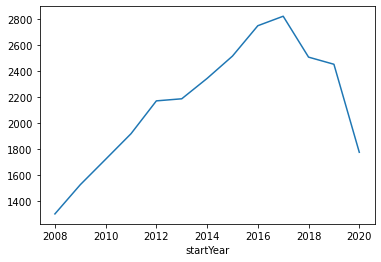

In [34]:
# plotting number of horror movies released over the years
imdb_horror_df2.groupby("startYear").count()["averageRating"].plot();

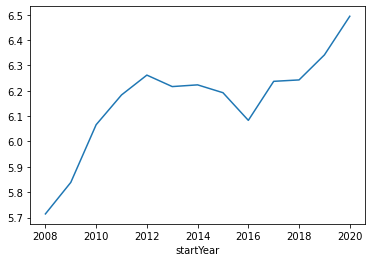

In [35]:
# Plotting average rating of horror movies over the years
imdb_horror_df2.groupby("startYear").mean()["averageRating"].plot();

In [36]:
# Saving the horror movies dataset
proc_dir = "Data/Processed"
new_filename = "IMDB Horror (Processed) Dataset.csv"

imdb_horror_df2.to_csv(os.path.join(proc_dir, new_filename))
print(f"File {new_filename} saved.")

File IMDB Horror (Processed) Dataset.csv saved.


# Viewing the Halloween Dataset

In [37]:
# Loading dataset
halloween_df = pd.read_excel(os.path.join(raw_dir, "HalloweenTableau2020.xlsx"), parse_dates=True)
halloween_df.head()

,Date,Date and Time,Count,Day of Week,Time
0,2008-10-31,2008-10-31 18:00:00,0,Friday,6:00pm
1,2008-10-31,2008-10-31 18:30:00,75,Friday,6:30pm
2,2008-10-31,2008-10-31 19:00:00,117,Friday,7:00pm
3,2008-10-31,2008-10-31 19:30:00,147,Friday,7:30pm
4,2008-10-31,2008-10-31 20:00:00,144,Friday,8:00pm


In [38]:
# Creating the `Year` variable
halloween_df["Year"] = halloween_df["Date and Time"].dt.year
halloween_df.head()

,Date,Date and Time,Count,Day of Week,Time,Year
0,2008-10-31,2008-10-31 18:00:00,0,Friday,6:00pm,2008
1,2008-10-31,2008-10-31 18:30:00,75,Friday,6:30pm,2008
2,2008-10-31,2008-10-31 19:00:00,117,Friday,7:00pm,2008
3,2008-10-31,2008-10-31 19:30:00,147,Friday,7:30pm,2008
4,2008-10-31,2008-10-31 20:00:00,144,Friday,8:00pm,2008


In [39]:
# Updating the index to view data in a comprehensive manner.
halloween_df.set_index(["Year", "Time"], inplace=True)
halloween_df.head()

Date       Date and Time  Count Day of Week
Year Time                                                    
2008 6:00pm 2008-10-31 2008-10-31 18:00:00      0      Friday
     6:30pm 2008-10-31 2008-10-31 18:30:00     75      Friday
     7:00pm 2008-10-31 2008-10-31 19:00:00    117      Friday
     7:30pm 2008-10-31 2008-10-31 19:30:00    147      Friday
     8:00pm 2008-10-31 2008-10-31 20:00:00    144      Friday

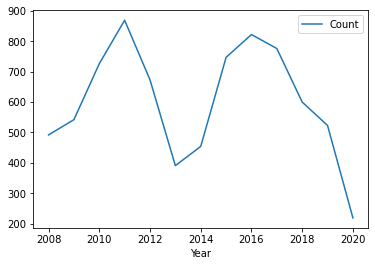

In [40]:
# Plotting number of candies treated by year
halloween_df.groupby("Year").sum().plot();

In [41]:
combined_df = pd.concat([halloween_df.groupby("Year").sum(),
                         imdb_horror_df2.groupby("startYear").mean().round(2)], axis=1)
combined_df.head()

,Count,averageRating,numVotes
2008,492,5.71,1751.86
2009,542,5.84,2091.34
2010,726,6.07,2214.74
2011,869,6.18,1766.91
2012,673,6.26,1362.13


In [42]:
combined_df["numberOfCandies"] = combined_df["Count"]
combined_df.drop("Count", axis=1, inplace=True)
combined_df.head()

,averageRating,numVotes,numberOfCandies
2008,5.71,1751.86,492
2009,5.84,2091.34,542
2010,6.07,2214.74,726
2011,6.18,1766.91,869
2012,6.26,1362.13,673


In [43]:
combined_df["numberOfHorrorMovies"] = imdb_horror_df2.groupby("startYear").count()["averageRating"]
combined_df

,averageRating,numVotes,numberOfCandies,numberOfHorrorMovies
2008,5.71,1751.86,492,1299
2009,5.84,2091.34,542,1524
2010,6.07,2214.74,726,1720
2011,6.18,1766.91,869,1917
2012,6.26,1362.13,673,2170
2013,6.22,2291.77,391,2186
2014,6.22,1451.37,454,2343
2015,6.19,1147.26,747,2515
2016,6.08,1908.80,822,2749
2017,6.24,1552.60,776,2822


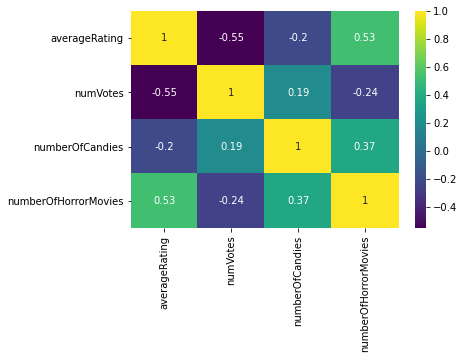

In [44]:
sns.heatmap(combined_df.corr(), annot=True, cmap="viridis");

# Cleaning up
In this section, I will delete all the files that are not needed for the creation of the visualization

In [45]:
# File names to be deleted.
filenames.remove("IMDB Horror movies.csv")
filenames

['IMDB_ratings.tsv', 'IMDB_basic_info.tsv']

In [46]:
for filename in filenames:
    path = pathlib.Path(raw_dir) / filename
    if path.exists():
        path.unlink()
        print(f"{filename} deleted.")
    else:
        print(f"{filename} already deleted.")
        

IMDB_ratings.tsv deleted.
IMDB_basic_info.tsv deleted.
